### Question 1

1. Generate two sets of 10 dimensional (10 attribute data), one for each class. You can use any
covariance matrix you would like, however, the matrix should contain covariance between at
least 3 of the attributes. Similarly, you can use any class means you would like. However, you
must be sure that when using a linear classifier (as we will do herein), you will have some errors
when classifying the training data (i.e. ensure that the distance between the means is small
enough AND the variance is large enough so that the classes overlap somewhat.

In [5]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import mean_squared_error
np.random.seed(131)
mean1 = [-3, 0, 3, 1, 3.5, 2, 6, .6, 7, -1]
cov = [
    [8, 1, 0, 4, 5, 0, 0, 0, 0, 0],
    [1, 7, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 14, 0, 0, 0, 0, 0, 0, 0],
    [4, 0, 0, 9, 0, 0, 0, 0, 0, 0],
    [5, 0, 0, 0, 10, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 8, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 12, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 11, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 8, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 9],
]
cov = 0.5*(cov+np.transpose(cov))
X1 = np.random.multivariate_normal(mean1, cov, 1000)

mean2 = [-1, 5, -3, -2, -.5, 2, 0, -1.5, 3.5, 4]
X2 = np.random.multivariate_normal(mean2, cov, 1000)

X = np.concatenate((X1,X2))

Xc = np.zeros(1000)
Xc = np.concatenate((Xc, np.ones(1000)))


0 1


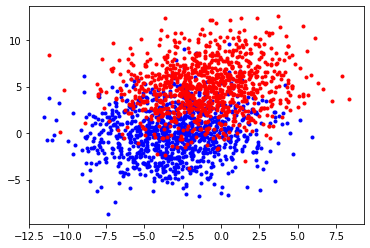

1 2


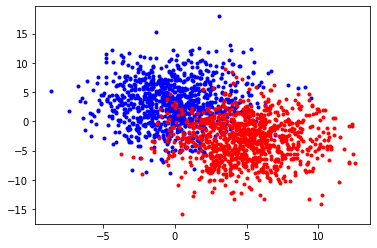

2 3


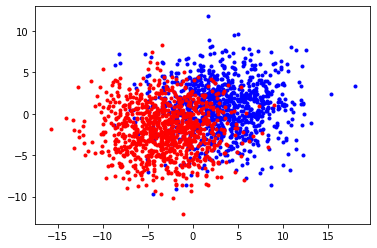

3 4


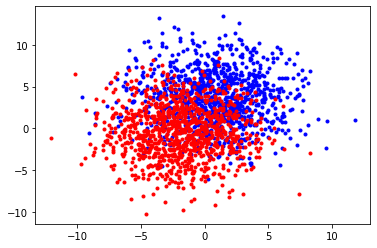

4 5


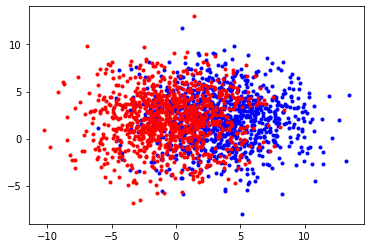

5 6


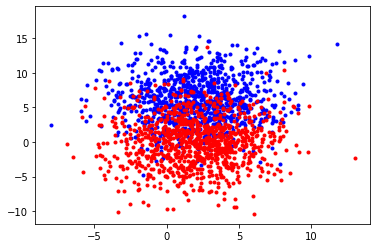

6 7


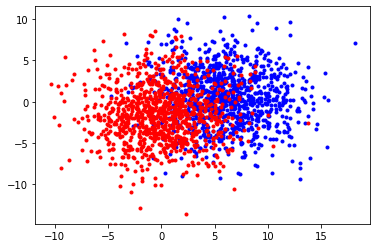

7 8


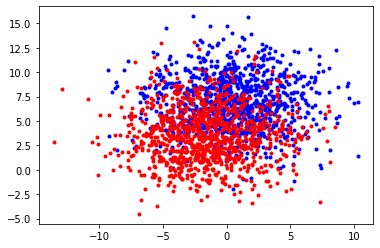

8 9


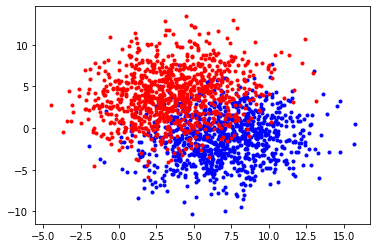

In [131]:
# checking for overlap in the data.
for i in range(X1.shape[1]-1):
    print(i,i+1)
    plt.scatter(X1[:,i], X1[:,i+1], c = 'b', marker = '.')
    plt.scatter(X2[:,i], X2[:,i+1], c = 'r', marker = '.')
    plt.show()


### Question 2

Take the ENTIRE dataset (both classes) and use PCA to represent the data in score space. With
the PCA representation, do the following:
1. Reduce the dimensionality to 10, 9, 8, 7, 6 and 5 by incrementally removing the
direction in the data corresponding to the smallest variance and, from the resulting
scores, reconstruct the original 10-dimensional data (in other words, apply the PCA
formula backwards). Determine the mean square error between the reconstructed
dataset and the original data and plot the result for 10, 9, 8, 7, 6 and 5 retained
dimensions.
2. Follow the same dimensionality reduction procedure as part (a) except classify all of the
data in the dataset using the PCA scores with FLD and determine the classification error
instead of determining the reconstruction MSE. Plot the classification error result (total
for both classes) for the 10, 9, 8, 7, 6 and 5 retained dimensions.

total pca mse with 10 features =  0.0
total pca error with 10 features =  18.0
total pca mse with 9 features =  0.267
total pca error with 9 features =  28.0
total pca mse with 8 features =  0.969
total pca error with 8 features =  27.0
total pca mse with 7 features =  1.77
total pca error with 7 features =  29.0
total pca mse with 6 features =  2.654
total pca error with 6 features =  35.0
total pca mse with 5 features =  3.64
total pca error with 5 features =  37.0


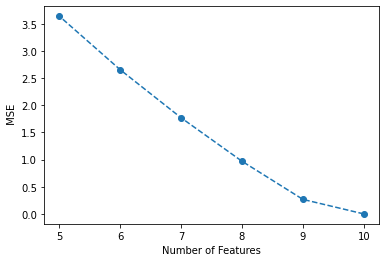

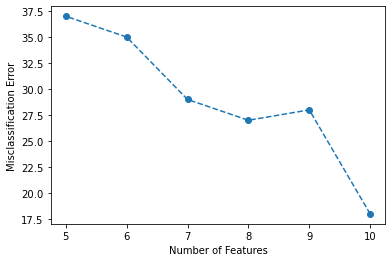

In [7]:
# from sklearn.decomposition import PCA
# import sklearn.discriminant_analysis
# from sklearn.metrics import mean_squared_error
# np.random.seed(131)
# classificationError = np.zeros(10,)
# mis_class = []
# mse = []
# for i in list(range(5,11))[::-1]: 
#     pca = PCA(n_components=i)
#     pca.fit(X)
#     yReduced=pca.transform(X)
#     XReconstructed = pca.inverse_transform(yReduced)
#     mse.append(mean_squared_error(X,XReconstructed))
#     print(f"total pca mse with {i} features = ", round(mean_squared_error(X,XReconstructed),3))
#     lda = sklearn.discriminant_analysis.LinearDiscriminantAnalysis()
#     lda.fit(yReduced,Xc)
#     #testing
#     prediction = lda.predict(yReduced)
#     classificationError[i-1] = sum(prediction != Xc) # sum(prediction != Xc)
#     print(f"total pca error with {i} features = ", classificationError[i-1])
#     mis_class.append(classificationError[i-1])

# plt.plot([10,9,8,7,6,5],mse, linestyle='--', marker='o')
# plt.ylabel(' MSE')
# plt.xlabel('Number of Features')
# plt.show()

# plt.plot([10,9,8,7,6,5],mis_class, linestyle='--', marker='o')
# plt.ylabel('Misclassification Error')
# plt.xlabel('Number of Features')
# plt.show()


total pca mse with 10 features = 0.0
total pca error with 10 features =  18.0

total pca mse with 9 features = 3.127
total pca error with 9 features =  27.0

total pca mse with 8 features = 11.535
total pca error with 8 features =  26.0

total pca mse with 7 features = 21.844
total pca error with 7 features =  30.0

total pca mse with 6 features = 31.005
total pca error with 6 features =  36.0

total pca mse with 5 features = 46.509
total pca error with 5 features =  40.0


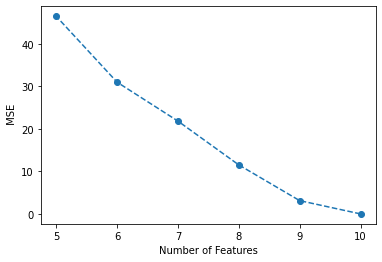

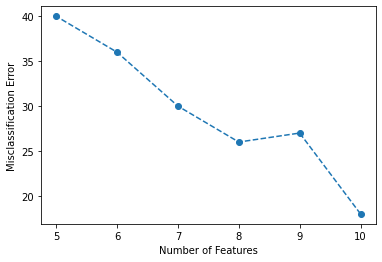

In [6]:
np.random.seed(131)
Xmc = X - np.mean(X)
D,E = np.linalg.eig(np.dot(Xmc.T,Xmc))
mis_class = []
mse = []
sortIndex = np.flip(np.argsort(D))

ESorted = np.empty((10,0))
dimension = 10
for i in range(dimension):
    ESorted = np.append(ESorted, E[:,sortIndex[i]].reshape(10,1), axis=1)


meanSquareError = np.zeros(10,)
classificationError = np.zeros(10,)
ySorted = np.dot(X,ESorted)
lda = LinearDiscriminantAnalysis()
for numDims in list(range(5,11))[::-1]:  
    # reconstruction
    yReduced = ySorted[:,0:numDims]
    EReduced = ESorted[:,0:numDims]
    XReconstructed = np.dot(yReduced, np.transpose(EReduced))
    meanSquareError[numDims-1] = sum(sum((XReconstructed - X)**2))/2000
    mse.append(meanSquareError[numDims-1])
    print(f"\ntotal pca mse with {numDims} features = {round(meanSquareError[numDims-1],3)}")
    # classification
    #training
    lda.fit(yReduced,Xc)
    #testing
    prediction = lda.predict(yReduced)
    classificationError[numDims-1] = sum(prediction != Xc) # sum(prediction != Xc)
    print(f"total pca error with {numDims} features = ", classificationError[numDims-1])
    mis_class.append(classificationError[numDims-1])

plt.plot([10,9,8,7,6,5],mse, linestyle='--', marker='o')
plt.ylabel(' MSE')
plt.xlabel('Number of Features')
plt.show()

plt.plot([10,9,8,7,6,5],mis_class, linestyle='--', marker='o')
plt.ylabel('Misclassification Error')
plt.xlabel('Number of Features')
plt.show()

### Question 3

Reduce the dimensionality of the original dataset using a backward search to 10, 9, 8, 7, 6 and 5
(by minimizing the error) and classify all of the data in the dataset using the reduced
dimensional data with FLD. Plot the classification error result (total for both classes) for the 10,
9, 8, 7, 6 and 5 retained dimensions.

total feature selection error with 10 features = 18.0
total feature selection error with 9 features = 19.0
total feature selection error with 8 features = 20.0
total feature selection error with 7 features = 21.0
total feature selection error with 6 features = 31.0
total feature selection error with 5 features = 40.0


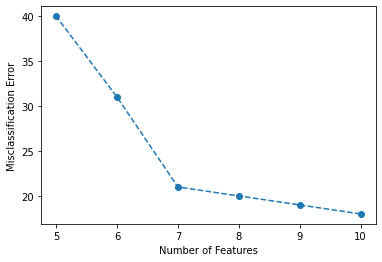

In [8]:
# import sklearn.discriminant_analysis
# from sklearn.feature_selection import SequentialFeatureSelector
# np.random.seed(131)
# error=np.ones(6)
# lda.fit(X,Xc)
# prediction = lda.predict(X)
# error[0] = sum(prediction !=  Xc)
# print(f"total feature selection error with {10} features = {error[0]}")

# for i in [1,2,3,4,5]:
#     j=10-i
#     lda = sklearn.discriminant_analysis.LinearDiscriminantAnalysis()
#     sfs = SequentialFeatureSelector(lda, n_features_to_select=j,direction='backward', scoring='accuracy')
#     sfs.fit(X, Xc)
#     Xtest=sfs.transform(X)
#     lda.fit(Xtest,Xc)
#     prediction = lda.predict(Xtest)
#     error[i] = sum(prediction !=  Xc)
#     print(f"total feature selection error with {10-i} features = {error[i]}")

# plt.plot([10,9,8,7,6,5],error, linestyle='--', marker='o')
# plt.ylabel('Misclassification Error')
# plt.xlabel('Number of Features')
# plt.show()

total feature selection error with 10 features = 18
total feature selection error with 9 features =  19
total feature selection error with 8 features =  20
total feature selection error with 7 features =  21
total feature selection error with 6 features =  31
total feature selection error with 5 features =  40


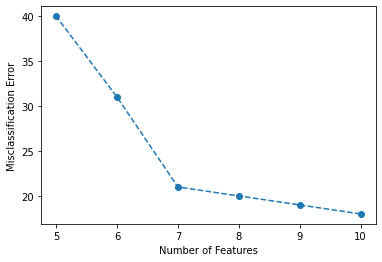

In [9]:
# backward feature selection
#initialize the best features to a value that is invalid as a feature index
#this is a forward search

np.random.seed(131)
mis_class=[]
lda.fit(X,Xc)
prediction = lda.predict(X)
error= sum(prediction !=  Xc)
print(f"total feature selection error with {10} features = {error}")
mis_class.append(error)
dimension = 5
#list of features remaining by index
remaining = 10
#currently selected features from dataset
Xselection = X

#iterate over all selected features

for iteration in range(dimension):
    
    #iterate over remaining features
    error = np.ones(10-iteration)
    for i in range(remaining):
        #now, add this to the previously selected features
        Xtest = Xselection
        # Xtest = np.append(Xtest, X[:,i].reshape(2000,1), axis=1 )
        Xtest = np.delete(Xtest, i, axis=1 )
        #classify the training data using currently selected features
        lda = LinearDiscriminantAnalysis()
        lda.fit(Xtest,Xc)
        prediction = lda.predict(Xtest)            
        error[i] = sum(prediction != Xc)
    #get the index of the worst feature
    worst = np.argmin(error)
    #update the remaining feature list
    remaining=remaining-1
    #update the currently selected features from the database
    Xselection = np.delete(Xselection, worst, axis=1)
    #training set result with feature selection...
    lda = LinearDiscriminantAnalysis()
    lda.fit(Xselection,Xc)
    prediction = lda.predict(Xselection)
    error = sum(prediction != Xc)
    print(f"total feature selection error with {9-iteration} features = ", error)
    mis_class.append(error)

plt.plot([10,9,8,7,6,5],mis_class, linestyle='--', marker='o')
plt.ylabel('Misclassification Error')
plt.xlabel('Number of Features')
plt.show()

### Question 4

Qualitatively compare the results of part 2b and part 3 and comment on any differences.

It should be noted that I used sklearn package to confirm my work. I have commented out the sklearn referenced code; however, they are included above for completion.

When comparing the results in part 2b and 3. The obvious similarities are as the misclassification error is most reduced in both methods when we have the largest number of features in the model and we see an increase the error rate as the features are reduced. The notable difference between the two results is the changes from 7 features to 10. With backward selection we see that effectively after 7 features the reduction in error is minimal. However, when we look at pca result we see that from 7 to 8 features there is still a reasonably large difference in error rate and in fact we see an increase in error rate at 9 features followed by large drop in error rate with 10 features. It seems that in this case backward selection out performed pca in dimension reduction. With backward selection we can reduce the features to 7, however, the same conclusion can be drawn with pca.
